In [ ]:
!pip install wfdb neurokit2 tensorflow scikit-learn matplotlib

In [ ]:
import os
import wfdb
import numpy as np
import neurokit2 as nk
import pandas as pd

In [ ]:
db_name = 'ecg-arrhythmia'
download_dir = './ecg-arrhythmia-1.0.0'
records=["WFDBRecords/01/012/"]

# Descargar un registro en particular
if not os.path.isdir(download_dir):
    print("Downloading the database from PhysioNet...")
    wfdb.dl_database(db_name, dl_dir=download_dir, records=records)
else:
    print("Database already downloaded.")

Database already downloaded.


In [149]:
record_name = 'WFDBRecords\\01\\015\\JS00521'  # Cambiar al registro de interes

#Realizar lectura
record_path = os.path.join(download_dir, record_name)
record = wfdb.rdrecord(record_path)
signal_array = np.array(record.p_signal)
print("Signal array shape:", signal_array.shape)

Signal array shape: (5000, 12)


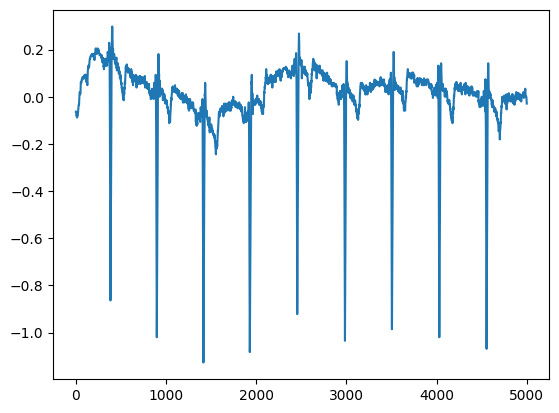

In [150]:
#Visualizar
import matplotlib.pyplot as plt
plt.plot(signal_array[:,3])
plt.show()

In [151]:
print("Sampling frequency:", record.fs)

Sampling frequency: 500


In [152]:
record.record_name

'JS00521'

In [153]:
record.n_sig

12

In [154]:
record.units

['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV']

In [155]:
record.to_dataframe()

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0 days 00:00:00,0.020,0.107,0.088,-0.063,-0.034,0.098,0.068,0.244,0.098,-0.107,-0.254,-0.215
0 days 00:00:00.002000,0.020,0.107,0.088,-0.063,-0.034,0.098,0.068,0.244,0.098,-0.107,-0.254,-0.215
0 days 00:00:00.004000,0.020,0.107,0.088,-0.063,-0.034,0.098,0.068,0.244,0.098,-0.107,-0.254,-0.215
0 days 00:00:00.006000,0.020,0.107,0.088,-0.063,-0.034,0.098,0.068,0.244,0.098,-0.107,-0.254,-0.215
0 days 00:00:00.008000,0.034,0.117,0.083,-0.073,-0.024,0.098,0.059,0.234,0.088,-0.127,-0.268,-0.224
...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:00:09.990000,0.024,-0.015,-0.039,-0.005,0.029,-0.029,-0.317,-0.312,-0.527,-0.400,-1.249,-0.644
0 days 00:00:09.992000,0.029,-0.010,-0.039,-0.010,0.034,-0.024,-0.312,-0.312,-0.527,-0.400,-1.249,-0.644
0 days 00:00:09.994000,0.034,-0.005,-0.039,-0.015,0.034,-0.024,-0.307,-0.312,-0.527,-0.400,-1.249,-0.644
0 days 00:00:09.996000,0.039,0.000,-0.039,-0.020,0.039,-0.020,-0.303,-0.312,-0.527,-0.400,-1.249,-0.644


In [156]:
record.comments

['Age: 72',
 'Sex: Female',
 'Dx: 426177001,55827005,164934002,59931005',
 'Rx: Unknown',
 'Hx: Unknown',
 'Sx: Unknown']

In [157]:
ecg_signal = record.p_signal[:, 0]
sampling_rate = record.fs

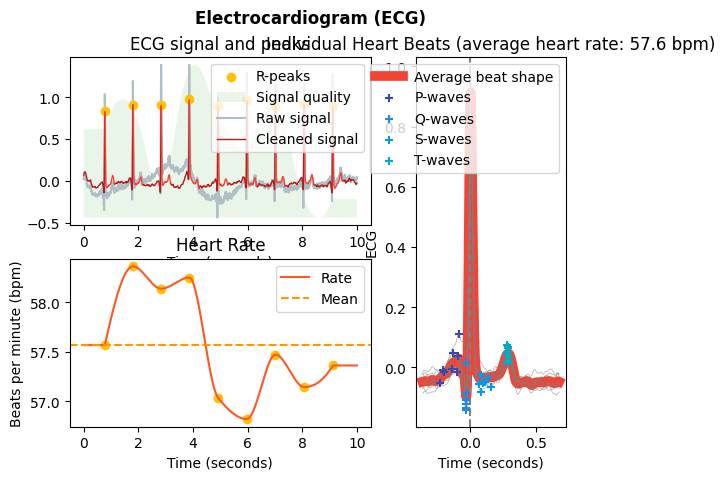

In [159]:
# Limpieza y detección de R-peak.
processed_signals, info = nk.ecg_process(ecg_signal, sampling_rate=sampling_rate)
nk.ecg_plot(processed_signals, info)

In [ ]:
#Características en el dominio del tiempo de la variabilidad de la frecuencia cardíaca (hrv) basándose en los picos R.
rpeaks = processed_signals["ECG_R_Peaks"]
hrv_time = nk.hrv_time(rpeaks, sampling_rate=sampling_rate, show=False)
hrv_time

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,1042.25,10.819955,NaN,NaN,NaN,NaN,NaN,NaN,10.11364,10.564992,...,19.0,1.069838,1030.8,1051.2,0.0,12.5,1028.0,1056.0,4.0,0.0


In [161]:
mapping_df = pd.read_csv("./ecg-arrhythmia-1.0.0/ConditionNames_SNOMED-CT.csv")

In [162]:
selected_codes = ["426177001", "426783006", "164889003", "427084000"]

filtered_df = mapping_df[mapping_df["Snomed_CT"].astype(str).isin(selected_codes)]

mapping_dict = dict(zip(filtered_df["Snomed_CT"].astype(str), filtered_df["Acronym Name"]))

print(mapping_dict)

{'426177001': 'SB', '426783006': 'SR', '164889003': 'AFIB', '427084000': 'ST'}


In [163]:
def get_arrhythmia_label(comments, mapping):
    for comment in comments:
        if comment.startswith("Dx:"):
            codes_str = comment[len("Dx:"):].strip()
            codes = [code.strip() for code in codes_str.split(",")]
            for code in codes:
                if code in mapping:
                    return mapping[code]
            return "Unknown"
    return "Unknown"
label = get_arrhythmia_label(record.comments, mapping_dict)
label

'SB'

# Etiquetado

In [ ]:
def assign_label(comments, mapping):
    for c in comments:
        if c.startswith("Dx:"):
            codes_str = c[len("Dx:"):].strip()
            codes = [code.strip() for code in codes_str.split(",")]
            for code in codes:
                if code in mapping:
                    return mapping[code]
            return "Unknown"
    return "Unknown"

# Procesamiento señal ECG

In [168]:
import os
base_dir = './ecg-arrhythmia-1.0.0/WFDBRecords'
records = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.hea'):
            record_name = os.path.splitext(file)[0]
            record_path = os.path.join(root, record_name)
            records.append(record_path)
            

all_signals = []  # Lista para recopilar señales ECG de los registros.
all_labels = []    # Lista para recopilar etiquetas de arritmias de los registros.
for r in records[:1000]:
    try:
        record = wfdb.rdrecord(r)
        fs = record.fs
        ecg_signal = record.p_signal[:,0]
        label = assign_label(record.comments, mapping_dict)
        all_signals.append(ecg_signal)
        all_labels.append(label)
    except Exception as e:
        print(f"Could not process {r} record: {e}")


In [ ]:
from tensorflow.keras.utils import to_categorical

X = np.array(all_signals)
X = X[..., np.newaxis]
unique_labels = sorted(list(set(all_labels)))
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
indexed_labels = [label_to_index[label] for label in all_labels]

num_classes = len(unique_labels)
y = to_categorical(indexed_labels, num_classes=num_classes)

In [176]:
X.shape

(1000, 5000, 1)

In [177]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Label mapping:", label_to_index)

X shape: (1000, 5000, 1)
y shape: (1000, 5)
Label mapping: {'AFIB': 0, 'SB': 1, 'SR': 2, 'ST': 3, 'Unknown': 4}


In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=indexed_labels)

In [180]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

input_shape = X_train.shape[1:]
model = Sequential([
    Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=input_shape),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size = 32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 4996, 32)       │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 2498, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2498, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 2494, 64)       │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 1247, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1247, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 79808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    10,215,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,226,693 (39.01 MB)

 Trainable params: 10,226,693 (39.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 306ms/step - accuracy: 0.3508 - loss: 1.7278 - val_accuracy: 0.4600 - val_loss: 1.4085
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 301ms/step - accuracy: 0.4520 - loss: 1.3871 - val_accuracy: 0.4650 - val_loss: 1.3490
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 295ms/step - accuracy: 0.5238 - loss: 1.1463 - val_accuracy: 0.4700 - val_loss: 1.4554
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 310ms/step - accuracy: 0.7231 - loss: 0.7624 - val_accuracy: 0.4700 - val_loss: 1.6852
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 327ms/step - accuracy: 0.8704 - loss: 0.4681 - val_accuracy: 0.4250 - val_loss: 1.9744
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step - accuracy: 0.9026 - loss: 0.2802 - val_accuracy: 0.4100 - val_loss: 2.1138
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 299ms/step - accuracy: 0.9665 - loss: 0.1560 - val_accuracy: 0.4400 - val_loss: 2.6660
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 305ms/step - accuracy: 0.9915 - loss: 0.0653 - val_accuracy: 0

# Evaluación del modelo

In [185]:
record_name = 'WFDBRecords/01/015/JS00521'  # Cambiar al registro de interes

#Realizar lectura
record_path = os.path.join(download_dir, record_name)
record = wfdb.rdrecord(record_path)
signal_array = np.array(record.p_signal)
print("Signal array shape:", signal_array.shape)

Signal array shape: (5000, 12)


In [186]:
record.comments

['Age: 72',
 'Sex: Female',
 'Dx: 426177001,55827005,164934002,59931005',
 'Rx: Unknown',
 'Hx: Unknown',
 'Sx: Unknown']

In [187]:
record.p_signal[:,0]

array([0.02 , 0.02 , 0.02 , ..., 0.034, 0.039, 0.044])

In [188]:
records[503]

'./ecg-arrhythmia-1.0.0/WFDBRecords\\01\\015\\JS00521'

In [189]:
ecg_signal = record.p_signal[:,0] 
label = assign_label(record.comments, mapping_dict)

In [192]:
X_new =  ecg_signal[..., np.newaxis]
X_new.shape

(5000, 1)

In [193]:
sample = np.expand_dims(X_new, axis=0)

In [197]:
pred_probs = model.predict(sample)

pred_indices = np.argmax(pred_probs, axis=1)

label_to_index = {'AFIB': 0, 'SB': 1, 'SR': 2, 'ST': 3, 'Unknown': 4}

index_to_label = {v: k for k, v in label_to_index.items()}
predicted_labels = [index_to_label[idx] for idx in pred_indices]

print("Predicted labels for the new  ecg signal:")
print(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted labels for the new  ecg signal:
['SB']
